# Example

In [1]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

from sksurv.datasets import load_gbsg2
from sksurv.preprocessing import OneHotEncoder
from sksurv.ensemble import RandomSurvivalForest

import warnings
warnings.filterwarnings("ignore")

In [3]:
def train_example_model(random_state=2023):
    X, y = load_gbsg2()

    grade_str = X.loc[:, "tgrade"].astype(object).values[:, np.newaxis]
    grade_num = OrdinalEncoder(categories=[["I", "II", "III"]]).fit_transform(grade_str)

    X_no_grade = X.drop("tgrade", axis=1)
    Xt = OneHotEncoder().fit_transform(X_no_grade)
    Xt.loc[:, "tgrade"] = grade_num

    X_train, X_test, y_train, y_test = train_test_split(Xt, y, test_size=0.25, random_state=random_state)
    
    rsf = RandomSurvivalForest(
        n_estimators=200, 
        max_depth=4,
        max_features="sqrt",
        n_jobs=-1, 
        random_state=random_state
    )
    rsf.fit(X_train, y_train)

    return rsf, X_train, y_train, X_test, y_test

In [4]:
rsf, X_train, y_train, X_test, y_test = train_example_model(random_state=2023)

In [5]:
from src.ice import plot_ice
from src.pdp import plot_pdp
from src.pfi import plot_pfi

In [6]:
model = rsf

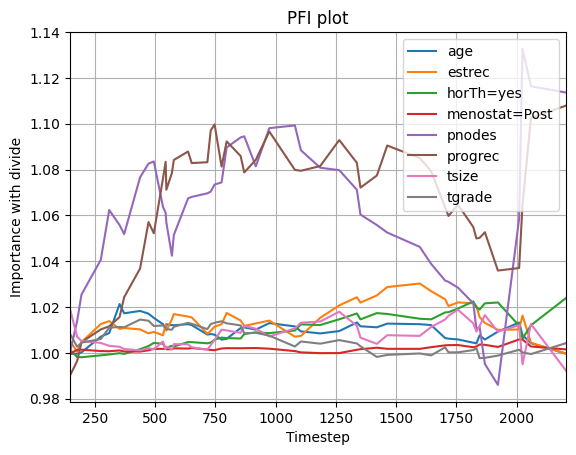

In [7]:
plot_pfi(model, X_test, y_test, n_permutations=20)

In [8]:
var_name = 'pnodes'
var_values = X_test.describe().pnodes[4:9] # quantiles + max

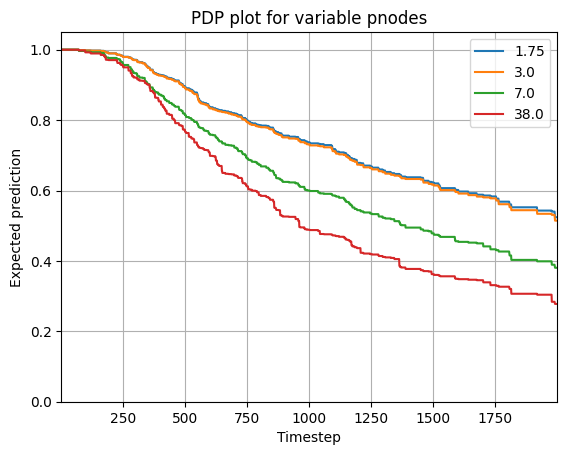

In [9]:
plot_pdp(model, var_name, var_values, X_test)

In [12]:
x = X_test.iloc[100]

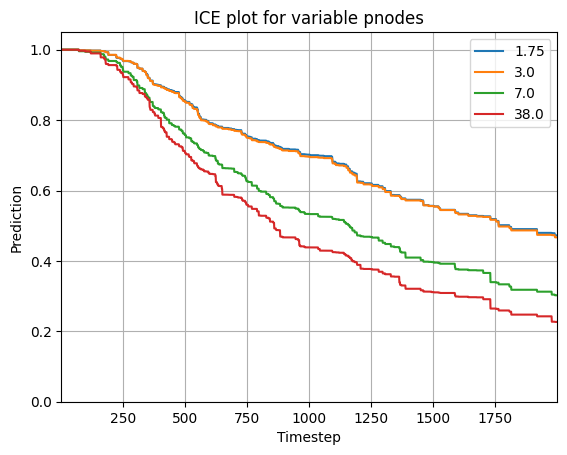

In [13]:
plot_ice(model, var_name, var_values, x)